In [31]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
import numpy as np

# ASTR 310 Lecture 26 - ordinary differential equations

### Exercise 1, Cosmology

Use `scipy.integrate.solve_ivp` to integrate the Friedmann equation describing the expansion of a universe containing matter and a cosmological constant:
$$ \frac{\dot{a}}{a} = H_0 \sqrt{\frac{\Omega_{m0}}{a^3} + \Omega_{\Lambda0} + \frac{1-\Omega_{m0}-\Omega_{\Lambda0}}{a^2}} $$

Here $H_0 \approx 68$ km $s^{-1}$ $Mpc^{-1} = 2.2\times 10^{-18}$ $s^{-1}$ is the Hubble constant. Integrate $a(t)$ starting from $a(0) = 10^{-6}$ and continue until $t = 1/H_0$. Try the following two models:

$$ \Omega_{m0} = 0.3, \Omega_{\Lambda0} = 0.7$$
$$ \Omega_{m0} = 1.0, \Omega_{\Lambda0} = 0.0. $$



Plot $a(t)$ for each model versus time. When is $a(t) = 1$?  That's the current age of the universe in those models.  (Interpolate, don't just eyeball it.)

[10 pts]

In [ ]:
H0 = 2.2e-18
def friedmann(t, a, om_m0, om_lam0):
    a_dot = a * H0 * (om_m0/a**3 + om_lam0 + (1 - om_m0 - om_lam0)/(a**2))**0.5

    return a_dot
                    # func      # x limits      # inital values
result1 = solve_ivp(friedmann, (0, 1/2.2e-18), [1e-6], args=(0.3, 0.7))
result2 = solve_ivp(friedmann, (0, 1/2.2e-18), [1e-6], args=(1, 0))

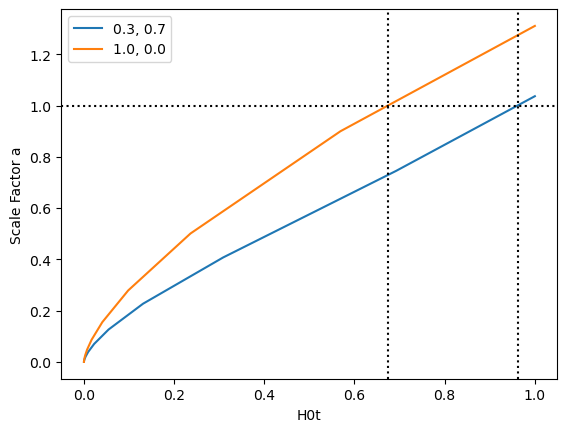

In [35]:
plt.plot(result1.t.flatten()*H0, result1.y.flatten(), label="0.3, 0.7")
plt.plot(result2.t.flatten()*H0, result2.y.flatten(), label="1.0, 0.0")
plt.xlabel("H0t")
plt.ylabel("Scale Factor a")
plt.legend()

interp1 = interp1d(result1.y.flatten(), result1.t.flatten(), kind='linear', fill_value='extrapolate')
interp2 = interp1d(result2.y.flatten(), result2.t.flatten(), kind='linear', fill_value='extrapolate')
plt.axhline(1, color='k', ls='dotted')
plt.axvline(interp1(1)*H0, color='k', ls='dotted')
plt.axvline(interp2(1)*H0, color='k', ls='dotted')

### Exercise 2, isothermal sphere

Numerical simulations of star formation often start with a structure called an isothermal sphere.  It is assumed to be temporarily in hydrostatic equilibrium until some external disturbance or shock drives it into collapse.  What’s the density structure of this object?

Hydrostatic equilibrium:  $dP = -\rho \frac{GM(r)}{r^2}\:dr$

Mass continuity:  $dM(r) = 4 \pi r^2 \rho \:dr$

Ideal gas equation of state: $ P = \rho k_B T/(\mu m_H),$  with $T = $ some known constant.

These can be combined into one 2nd order equation:
$$ \frac{d^2 \rho}{dr^2} = \frac{1}{\rho} \biggl(\frac{d\rho}{dr}\biggr)^2 - \frac{2}{r}\frac{d\rho}{dr} - 2\rho^2. $$

(Along the way we switched to dimensionless parameters to make the constants easier to deal with.  For example, $r/h \rightarrow r$ for some appropriate definition of a scale length $h$.)

Solve that 2nd order equation with the initial conditions $\rho(r_0) = 1$ and $\frac{d\rho}{dr}\biggr|_{r0} = 0.$ Unlike the singular isothermal sphere ($\rho \propto r^{-2}$), these conditions make a physically plausible structure which has a finite density and a smooth gradient at the center.  Technically we would like to evaluate those conditions at $r_0 = 0$ but in practice we will have to evaluate at $r_0 = 0.01$ which (as you will see) is small enough to be far away from all of the action.  Solve over the range $r = (0.01,10)$ and plot the solution, along with the singular isothermal sphere. 

[10 pts]

In [38]:
# y1 = p
# y2 = dp/dr

def isothermal(r, y):
    p, dp_dr = y

    dp2_dr = 1/p * dp_dr**2 - 2/r * dp_dr - 2*p**2

    return [dp_dr, dp2_dr]

r_range = (0.01, 10)
y1_initial = 1
y2_initial = 0

result = solve_ivp(isothermal, r_range, [y1_initial, y2_initial])
result

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e-02  1.050e-02 ...  8.443e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  1.531e-02  1.012e-02]
            [ 0.000e+00 -9.522e-04 ... -4.488e-03 -2.447e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0

Text(0.5, 1.0, 'Self-gravitating Isothermal Sphere')

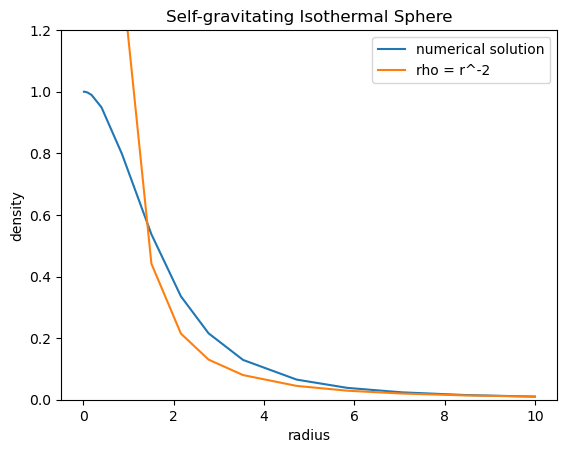

In [53]:
plt.plot(result.t, result.y[0], label='numerical solution')

r = result.t
rho = r**-2

plt.plot(r, rho, label='rho = r^-2')


plt.xlabel("radius")
plt.ylabel("density")
plt.legend()
plt.ylim(0, 1.2)
plt.title("Self-gravitating Isothermal Sphere")

### Extra Credit: planet in a binary star system

Use leapfrog integration to solve and plot the orbit of a planet in a binary star system in which the stars are moving in a circular orbit. Ignore the gravity of the planet.

... see the PDF for the relevant equations and constants ...

Run until $t = 2.8\times 10^{10}$ s with $\Delta t = 1.4\times 10^7$ s.  For initial conditions, use $x_p(0) =$ (62.1 AU, 0) and $v_p(0) = (0, 6.79\times 10^5$ cm/s).

[15 pts]